<a href="https://colab.research.google.com/github/Lukash23/Module-/blob/main/Mathematica_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lukash Shrestha 
Nicholas Jacob
MATH-2825-01
12/05/2022

### Define Helpull Libraries and Functions

In [ ]:
import math
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.signal import argrelextrema
plt.style.use('fivethirtyeight')

### Last number of the Student ID Number

In [ ]:
a = 5

### Question 01

In [ ]:
x = np.linspace(-4, 4, num = 10000)
left = -3
right = 4
bottom = -65
top = 20

In [ ]:
fx = []
gx = []
for i in range(len(x)):
    fx.append(x[i]**6 - x[i]**5 - a*x[i]**4 - x[i]**2 + x[i] - 1)
    gx.append(0)

In [ ]:
#print(fx)
#print(gx)

Roots on the Graph
[-1.89818982  2.81188119]


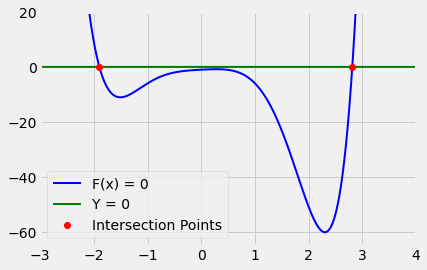

In [ ]:
#plt.axvline('x',linewidth=1)
#plt.axhline('y',linewidth=1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, fx, 'b', linewidth=2, label = 'F(x) = 0')
plt.plot(x, gx, 'g', linewidth=2, label = 'Y = 0')
plt.grid('on')
plt.xlim(left, right) 
plt.ylim(bottom, top)

fxa = np.array(fx)
gxa = np.array(gx)

idx = np.argwhere(np.diff(np.sign(fxa - gxa))).flatten()
plt.plot(x[idx], fxa[idx], 'ro', label = 'Intersection Points')
print("Roots on the Graph")
print(x[idx])
plt.legend()

plt.show()

### Comments

In this graph,
the function of f(x) and the y = 0 are plotted.

The intersection of above two plots are the roots of the function of f(x)

intersection point (i.e. roots) [-1.89818982  2.81188119]

In [ ]:
fn = [1, -1, -a, 0, -1, 1, -1]
roots = np.roots(fn)
print("All roots")
print(roots)
print(" ")
print("Only real roots")
print(roots[~np.iscomplex(roots)])

All roots
[ 2.81245654+0.j         -1.89809142+0.j         -0.37756334+0.64680885j
 -0.37756334-0.64680885j  0.42038078+0.3965398j   0.42038078-0.3965398j ]
 
Only real roots
[ 2.81245654+0.j -1.89809142+0.j]


### Comments

The roots are found using built-in command.

There are two real roots [ 2.81245654+0.j -1.89809142+0.j]

four complex roots [ 2.81245654+0.j         -1.89809142+0.j         -0.37756334+0.64680885j
 -0.37756334-0.64680885j  0.42038078+0.3965398j   0.42038078-0.3965398j ]

### Question 02

In [ ]:
y = x**a

In [ ]:
left = 0
right = 2
bottom =-10
top = 40

(-10.0, 40.0)

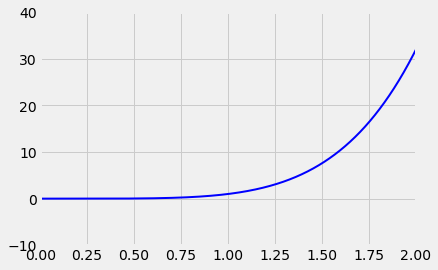

In [ ]:
plt.plot(x,y,'b', linewidth=2)
plt.grid('on')
plt.xlim(left, right) 
plt.ylim(bottom, top)

In [ ]:
sum = 0
ss = 100000
x = np.linspace(0, 2, num = ss)
dx = (2-0)/ss
print(dx)
#print(x)

2e-05


In [ ]:
for i in range(len(x)):
    y = x[i]**a
    sum += y*dx
    
print(sum)

10.66688000266657


### Comments

to find the area under the curve, the area was taken as a sum of area of rectangles in each x

Answer is 10.66688000266657

In [ ]:
def f(x):
    return x**a
  
x =  smp.Symbol("x")
print( smp.integrate(f(x), (x, 0, 2)))
print(round(smp.integrate(f(x), (x, 0, 2)),15))


32/3
10.666666666666667


### Comments

The answer was checked by using a definite integral

Answer is 10.666666666666667

In [ ]:
err = sum - round(smp.integrate(f(x), (x, 0, 2)),15)
print(err)
per_err = err * 100
print(per_err)

0.00021333599990298879
0.021333599990298879


### Comments

Error between two answers is 0.00021333599990298879 which less than 0.05%

### Question 03

In [ ]:
x = smp.symbols('x',real=True)
t = smp.symbols('t',real=True)
g = smp.sin(t)/t

In [ ]:
sum = 0
x = np.arange(0,21,1)
sx = []
tx = []
for i in range(len(x)):
    sx.append(smp.integrate(g,(t, 0, i)))
    tx.append(1)

sx = [0 if math.isnan(x) else x for x in sx]
print(sx)

[0, Si(1), Si(2), Si(3), Si(4), Si(5), Si(6), Si(7), Si(8), Si(9), Si(10), Si(11), Si(12), Si(13), Si(14), Si(15), Si(16), Si(17), Si(18), Si(19), Si(20)]


In [ ]:
arr = np.array(sx)
localmaxima = argrelextrema(arr, np.greater)
localminima = argrelextrema(arr, np.less)
print("Local Maxima: ",localmaxima)
print("Local Minima: ",localminima)

Local Maxima:  (array([ 3,  9, 16], dtype=int64),)
Local Minima:  (array([ 6, 13, 19], dtype=int64),)


In [ ]:
left = 0
right = 20
bottom = 0
top = 2

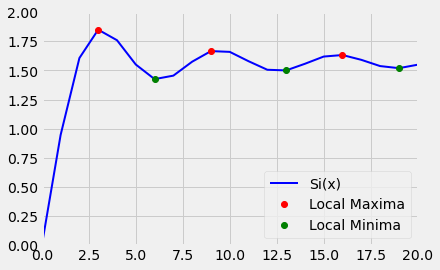

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,sx, 'b', linewidth=2, label = 'Si(x)')
plt.xlim(left, right) 
plt.ylim(bottom, top)

i = 0
for idx in localmaxima[0].tolist():
    ax.plot(x[idx], sx[idx], 'ro', label ='Local Maxima' if i == 0 else "")
    i += 1

i = 0
for idx in localminima[0].tolist():
    ax.plot(x[idx], sx[idx], 'go', label ='Local Minima' if i == 0 else "")
    i += 1


plt.legend()
# labels = ['Si(x)','Local Extrema']
# ax.legend(labels)
plt.show()

In [ ]:
for lmax in localmaxima[0].tolist():
    print(lmax)

3
9
16


In [ ]:
for lmin in localminima[0].tolist():
    print(lmin)

6
13
19


### Comments

Local Maximas occurs at 3, 9, 16

Local Minimas occurs at 6, 13, 19 

In [ ]:
# x = np.arange(0, 21, 1, dtype=int)
# sx = []
# for i in range(len(x)):
#     sx.append(si[i])
# print(sx)

[1]


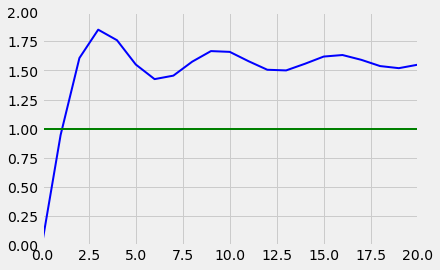

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,sx, 'b', linewidth=2)
plt.plot(x,tx, 'g', linewidth=2)
plt.xlim(left, right) 
plt.ylim(bottom, top)

sxa = np.array(sx)
txa = np.array(tx)

idx = np.argwhere(np.diff(np.sign(sxa - txa))).flatten()
print(idx)
#plt.plot(x[idx], sxa[idx], 'ro')
# print("Roots on the Graph")
# print(x[idx])
plt.show()

### Comments

Si(x) = 1 is occured where the intersection of function of Si(x) and y = 1 is happened, which is shown in above graph